<a href="https://colab.research.google.com/github/swadhwa5/MLFinalProject/blob/main/MLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
import skimage
from skimage.transform import rotate, AffineTransform, warp

In [ ]:
#Load Data
# return array of images
def loadImages(path):
    imagesList = listdir(path)
    imgs = []
    labels = []
    for image in imagesList:
      if imghdr.what(path + image) == 'png':
        img = Image.open(path + image)
        imgs.append(img)
        labels.append(image[6]) # assumes that filename structure is 'handx_[label]_....'
        
    return imgs, labels

In [ ]:
# Convert png img array to array np arrays
def ImagesToArray(imgs):
  imgs_array = []
  for img in imgs:
    img_array = np.array(img)
    imgs_array.append(img_array)
  return imgs_array

In [ ]:
def Brighten(imgs):
  for i, img in enumerate(imgs):
    img = Image.fromarray(img)
    enhancer = ImageEnhance.Brightness(img)
    factor = 0.5 #darkens the image
    dark_img = enhancer.enhance(factor)
    dark_img.save('./Brightness_dark/img_' + str(i) + '_dark.png')

    factor = 1.5 #brightens the image
    light_img = enhancer.enhance(factor)
    light_img.save('./Brightness_light/img_' + str(i) + '_light.png')

In [20]:
def Rotate30(imgs): 
  rot30_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = rotate(img, 30) 
    rot30_imgs[i, :] = new_img
  return rot30_imgs

In [19]:
def RotateNeg30(imgs):
  rot30_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = rotate(img, -30) 
    rot30_imgs[i, :] = new_img
  return rot30_imgs

In [16]:
def VerticalFlip(imgs): 
  flip_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = np.fliplr(img)
    flip_imgs[i, :, :, :] = new_img
  return flip_imgs

In [42]:
def Translation(imgs): 
  trans_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    rand_x = random.randrange(-150, 150, 50)
    rand_y = random.randrange(-150, 150, 50)
    transform = AffineTransform(translation=(rand_x,rand_y))
    new_img = warp(img,transform, mode="constant")  
    trans_imgs[i, :] = new_img
  return trans_imgs

In [ ]:
# x is input image, sd is how much to blur
def GaussianBlur(imgs, sd=1):
  for i, img in enumerate(imgs):
    filtered_img = skimage.filters.gaussian(img, sigma=sd)
    filtered_img.save('./Filter_gaussian/img_' + str(i) + '_gaussianfilt.png')

In [ ]:
import random
def Crop(imgs):
  n = 600
  for i, png in enumerate(imgs): 
    ratio = random.uniform(0, 1)
    size = n * ratio
    x = int(size / 2)
    img = np.asarray(png)
    cropped = img.copy()
    print(cropped.shape)
    cropped[0:x] = np.zeros((n, 3))
    cropped[img.shape[0] - x - 1:img.shape[0] - 1] = np.zeros((x, n, 3))
    cropped[:, 0:x] = np.zeros((n, x, 3))
    cropped[:, img.shape[1] - 1 - x:img.shape[1] - 1] = np.zeros((n, x, 3))
    final = Image.fromarray(np.uint8(cropped*255))
    return cropped
    # final.save('./Crop/img_' + str(i) + '_crop.png')


In [ ]:
import cv2

def Scale(imgs):
  for i, img in enumerate(imgs):
    ratio = random.uniform(.3, .7)
    n = 600
    x = int(ratio * n / 2)
    scaled = img[x:n-x, x:n-x]
    res = cv2.resize(scaled, dsize=(600, 600), interpolation=cv2.INTER_CUBIC)
    final = Image.fromarray(np.uint8(res*255))
    return res
    # final.save('./Crop/img_' + str(i) + '_scale.png')

In [ ]:
# load png_images
path = "./Data/"

# images in an array named imgs
imgs = loadImages(path)

# convert png_images to np arrays
imgs_array = ImagesToArray(imgs)
print(imgs_array[0].shape)

# # Resize the images
# imgs_array = shape600(imgs_array)

# # Normalize images
imgs_array = Normalize(imgs_array)

# Augment the images
#Brighten
Brighten(imgs)

FileNotFoundError: ignored

In [25]:
### Additional Code: 4/20/22: Redid Shape function, normalize, and also completed blur. Each assumes images list --> shape-->normalize-->blur

import numpy as np
import skimage
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
import skimage
from skimage.transform import rotate, AffineTransform, warp
from skimage import filters
from torchvision import transforms
import cv2
import scipy
import random


from google.colab import files
# uploaded = files.upload() # Get a folder named Data.zip

In [6]:
!unzip Data2.zip

Archive:  Data2.zip
   creating: Data2/
  inflating: Data2/hand1_n_bot_seg_3_cropped.png  
  inflating: __MACOSX/Data2/._hand1_n_bot_seg_3_cropped.png  
  inflating: Data2/hand1_h_left_seg_3_cropped.png  
  inflating: __MACOSX/Data2/._hand1_h_left_seg_3_cropped.png  
  inflating: Data2/hand1_k_bot_seg_1_cropped.png  
  inflating: __MACOSX/Data2/._hand1_k_bot_seg_1_cropped.png  
  inflating: Data2/hand1_v_left_seg_2_cropped.png  
  inflating: __MACOSX/Data2/._hand1_v_left_seg_2_cropped.png  
  inflating: Data2/hand1_j_left_seg_5_cropped.png  
  inflating: __MACOSX/Data2/._hand1_j_left_seg_5_cropped.png  
  inflating: Data2/hand1_w_left_seg_1_cropped.png  
  inflating: __MACOSX/Data2/._hand1_w_left_seg_1_cropped.png  


6
(472, 211, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


final
(6, 600, 600, 3)


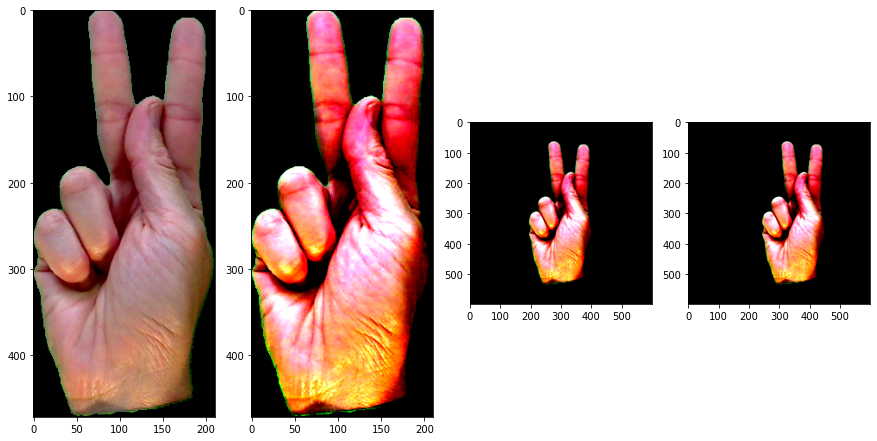

In [43]:
def shape600(x):
  print(len(x))
  print(x[0].shape)
  reshaped_array = np.zeros((len(x), 600, 600, 3))
  for i, img in enumerate(x):
    x_pad_width = (600 - img.shape[0])//2
    y_pad_width = (600 - img.shape[1])//2
    reshaped_array[i,:,:,:] = np.pad(img, ((x_pad_width, x_pad_width + (img.shape[0])%2), (y_pad_width, y_pad_width+(img.shape[1]%2)), (0,0)), constant_values=img[0][0][0])
  return reshaped_array

# Normalize images
def Normalize(imgs):
  new_imgs = []
  for img in imgs:
      # flat_img = img.flatten()
      m = np.mean(img)
      std = np.std(img)
      img = (img-m)/std
      new_imgs.append(img)
  return new_imgs

# x is input image, sd is how much to blur
def blur(imgs, sd=1):
  filtered_img = np.zeros((imgs.shape[0], 600, 600, 3))
  for i in range(imgs.shape[0]):
    filtered_img[i,:,:,:] = skimage.filters.gaussian(imgs[i,:,:,:], sigma=sd)
    #filtered_img.save('./Filter_gaussian/img_' + i + '_gaussianfilt.png')
  return filtered_img

def Scale(imgs):
  for i, img in enumerate(imgs):
    ratio = random.uniform(.3, .7)
    n = 600
    x = int(ratio * n / 2)
    scaled = img[x:n-x, x:n-x]
    res = cv2.resize(scaled, dsize=(600, 600), interpolation=cv2.INTER_CUBIC)
    final = Image.fromarray(np.uint8(res*255))
    return res
    # final.save('./Crop/img_' + str(i) + '_scale.png')

# load png_images
path = "./Data2/"

# images in an array named imgs
imgs, labels = loadImages(path)

# Step 1 convert png_images to np arrays
imgs_array_before = ImagesToArray(imgs)

# # Step 3 Normalize imagesreshaped
imgs_array_normalize = Normalize(imgs_array_before)

# # Step 2 Resize the images
imgs_array_reshaped = shape600(imgs_array_normalize)

# # Step 4 Blur the images
# blurred = blur(imgs_array, 10)

# cropped = Crop(imgs_array_normalize)
#scaled = Scale(imgs_array_reshaped)
# plt.imshow(cropped)

# Step5 Brighten the images
# Brighten(imgs_array_normalize)

# Step 6 Flip the images
#flipped = VerticalFlip(imgs_array_reshaped)

# Step 7 Rotate 30 Degrees
final = Translation(imgs_array_reshaped)
print('final')
print(final.shape)

# Show the progression of images for each step
fig, ax = plt.subplots(1, 4, figsize=(15,10))
ax[0].imshow(imgs_array_before[0]) # Step 1:
ax[1].imshow(imgs_array_normalize[0]) # Step 2
ax[2].imshow(imgs_array_reshaped[0]) # Step 3
ax[3].imshow(final[0]) # Step 4



/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


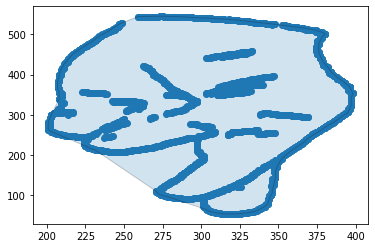

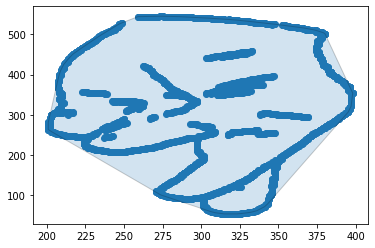

0.9470534135125575


In [ ]:
import alphashape
from descartes import PolygonPatch

def convex(imgs):
  out = np.empty((imgs.shape[0], 1))
  for i, img in enumerate(imgs): 
    orig = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    edges = cv2.Canny(orig,250,300)

    contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours = np.concatenate(contours)
    contours = contours.reshape((contours.shape[0], contours.shape[2]))

    alpha = alphashape.alphashape(contours, .01)
    convex = alphashape.alphashape(contours, 0.)

    out[i] = (alpha.area / convex.area)
  return out

# hull = scipy.spatial.ConvexHull(edgelist)
# plt.plot([i[0] for i in edgelist], [i[1] for i in edgelist], 'o')
# plt.plot(edgelist[hull.vertices,0], edgelist[hull.vertices,1], 'r--', lw=2)
# plt.show()

# plt.subplot(121),plt.imshow(orig,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.show()

In [ ]:
!pip install alphashape

     |████████████████████████████████| 642 kB 4.6 MB/s 
     |████████████████████████████████| 1.0 MB 24.3 MB/s 


In [ ]:
# Feature: Get proportion of hand in the image
def HandToBack(imgs):
  features = [0] * len(imgs)
  for i, img in enumerate(imgs):
    total_pixels = img.shape[0] * img.shape[1]
    hand_pixels = 0
    for j in range (img.shape[0]):
      for k in range (img.shape[1]):
        if img[j][k][0] != 0 and img[j][k][1] != 0 and img[j][k][2] != 0:
          hand_pixels += 1
    features[i] =  hand_pixels / total_pixels

  return features